## Initialization

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.io
from scipy.special import expit
from math import *
from scipy import optimize

In [5]:
sns.set_style('whitegrid')
%matplotlib inline

## Loading Data

In [39]:
mat = scipy.io.loadmat('ex3data1.mat')
X = mat['X']
y = mat['y']
X = np.insert(X,0,1,axis=1)

In [9]:
m,n = X.shape

## Functions Section

In [43]:
#functions Sections
def magic_display(matrix = None):
    if matrix is None:
        # selecting 100 random rows of the X
        rand_indces = np.random.permutation(m)[0:100]
        X_dis = X[rand_indces]
    else:
        X_dis = matrix
      
    if( len(X_dis.shape) > 1 ): 
        m_test,n_test = X_dis.shape
        axis_bound = 1
    else:
        m_test = 1
        n_test = X_dis.shape[0]
        axis_bound = 0
    
    # each number width , height in plot
    example_width = int(round(sqrt(n_test)))
    example_height = int(round( n_test / example_width ))

    # number of numbers to show in plot
    display_rows = floor(sqrt(m_test))
    display_cols = ceil(m_test / display_rows )

    # padding between numbers
    pad = 2

    # intilazation array for holding previos 100 random numbers
    display_array = np.ones((
                             pad + display_rows * ( example_height + pad ),
                             pad + display_cols * ( example_width + pad )
                            ))
    count = 0;
    
    for i in range(display_rows):
        for j in range(display_cols):
            if( count >= m_test ):
                break

            # max_val of each row in X_dis
            max_val = np.max( X_dis[count : count+1], axis= axis_bound)

            # Starting x,y point of numbers shape in array 
            ex_x_range = pad + ( i ) * ( example_height + pad )
            ex_y_range = pad + ( j ) * ( example_width + pad )
            
            if(m_test > 1):
                ex_arr = X_dis[ count : count + 1 , 1:].reshape(example_height , example_width)
            else:
                ex_arr = X_dis[1:].reshape(example_height , example_width)
                
            # Setting values
            display_array[ ex_x_range : ex_x_range + example_height,
                           ex_y_range : ex_y_range + example_width ] = np.divide(ex_arr , max_val)
            count += 1
    
    # Plotting 100 random data
    plt.figure(figsize=(12,8))

    # Get rod of grid
    plt.grid(False)
    plt.imshow(display_array)
    
def compareValueMatrix(i, matrix):
    return np.array([1 if x == i else 0 for x in y])

def hyp(theta, X = None):
    if ( X is None ):
        return expit(theta)
    else:
        return expit(np.dot(X,theta))

def cost_function(theta, X, y, _lam):
    J = 0
    
    # finding hypotesis matrix
    h = hyp(theta, X)
    
    # Computing Log(sigmoid(x)) for all of the hypotesis elements
    h1 = np.log(h)
    
    # Computing Log( 1 - simgoid(x)) for all of the hypotesis elements
    h2 = np.log(1 - h)
    
    #Computing Cost of the hypotesis
    J =  ( -1 / m ) * ( np.dot(y.T, h1 ) + np.dot( ( 1 - y).T , h2)) + ( np.dot(theta.T, theta) * _lam / ( 2 * m ))
    
    return J

def gradient_function(theta, X, y, _lam):    
    # finding hypotesis matrix
    h = hyp(theta, X)
    
    # Computing the Gradient Of the Hypotesis
    grad = np.zeros(n).T

    grad[0] = ( 1 / m ) * np.dot(  h - y.T , X[:,0] )
    grad[1:] = ( 1 / m ) * np.dot( h - y.T , X[:,1:] ) + ( _lam / m ) * theta[1:]
    
    return grad

def predict_values(values):
    # theta 10 * 401
    # X 5000 * 401
    
    if( len(values.shape) > 1 ):
        axis_bound = 1
    else:
        axis_bound = 0
        
    return np.argmax(values,axis=axis_bound)

## Visualizing Data

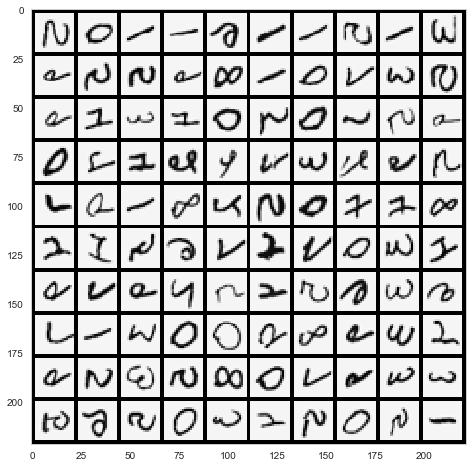

In [44]:
magic_display()

## One vs All Classification

In [45]:
m,n = X.shape
label_nums = 10
_lambda = 0
theta = np.zeros(n)
inital_theta = np.zeros(n)
theta_saver = np.zeros((10,n))

In [46]:
for i in range(label_nums):
    iclass = i if i else 10
    y_new = compareValueMatrix(iclass, y)
    result = optimize.fmin_bfgs(f= cost_function,x0= inital_theta,fprime= gradient_function, \
                                    args=(X, y_new, _lambda), maxiter=50, \
                                    disp=False,full_output=True)
    theta_saver[i] = result[0]
    print("Cost Function Last value for class " + str(i) + " ==> " + str(result[1]))

Cost Function Last value for class 0 ==> 0.015092397366845126
Cost Function Last value for class 1 ==> 0.022409449806085318
Cost Function Last value for class 2 ==> 0.0676947775091393
Cost Function Last value for class 3 ==> 0.07123503680803159
Cost Function Last value for class 4 ==> 0.04939468190383979
Cost Function Last value for class 5 ==> 0.07494862467883623
Cost Function Last value for class 6 ==> 0.03195108104824581
Cost Function Last value for class 7 ==> 0.04470354458476973
Cost Function Last value for class 8 ==> 0.09273787364070607
Cost Function Last value for class 9 ==> 0.08704364051054321


## Predecit Values

In [14]:
pred = predict_values(np.dot(X, theta_saver.T))
count = 0
for i in pred:
    if( i == 0 ): 
        pred[count] = 10
    count += 1

In [15]:
np.average(np.double( y.T == pred)) * 100

93.320000000000007

In [16]:
# "You should see that the training set accuracy is about 94.9%"
n_correct, n_total = 0., 0.
incorrect_indices = []
for irow in range(X.shape[0]):
    n_total += 1
    if pred[irow] == y[irow]:
        n_correct += 1
    else: incorrect_indices.append(irow)
print("Training set accuracy: %0.1f%%"%(100*(n_correct/n_total)))

Training set accuracy: 93.3%


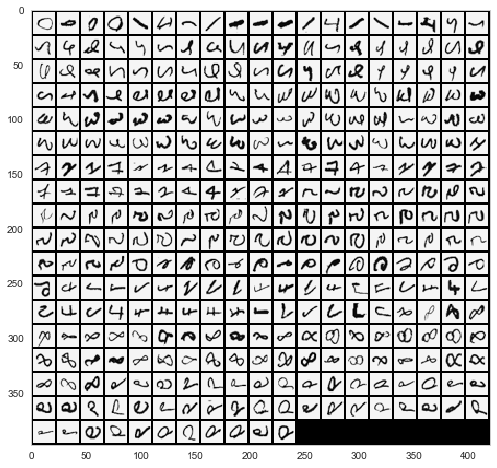

In [17]:
# Which Numbers predectid uncorrectly
magic_display(X[incorrect_indices])

## Nueral FeedForward

In [18]:
#Loading Data
weights = scipy.io.loadmat('ex3weights.mat')
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

In [28]:
def predict(Weight1,Weight2, X):
    hidden_lvl_act = hyp(Weight1.T, X)
    
    if(len(X.shape) > 1):
        axis_bound = 1
    else:
        axis_bound = 0
        
    # Adding columns of 1's to the matrix.
    hidden_lvl_act = np.insert(hidden_lvl_act,0,1,axis=axis_bound)
    
    out_lvl_act = hyp(Weight2.T, hidden_lvl_act)

    return predict_values(out_lvl_act)

In [29]:
pred_nueral = predict(Theta1,Theta2,X) + 1

In [30]:
np.average(np.double( y.T == pred_nueral)) * 100

97.519999999999996

This is 10


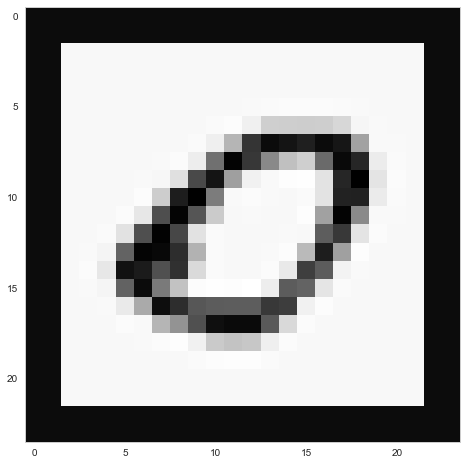

In [31]:
for i in range(1):
    magic_display(X[i])
    predicted_imgae = predict(Theta1, Theta2, X[i])
    print("This is " + str(predicted_imgae + 1));

In [33]:
hidden_lvl_act = hyp(Theta1.T, X)
    
if(len(X.shape) > 1):
    axis_bound = 1
else:
    axis_bound = 0

# Adding columns of 1's to the matrix.
hidden_lvl_act = np.insert(hidden_lvl_act,0,1,axis=axis_bound)

out_lvl_act = hyp(Theta2.T, hidden_lvl_act)